Análise das preferências musicais.

Importação das bibliotecas utilizadas.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lendo nossos dados.

In [38]:
data = pd.read_csv('data/music_project_en.csv')

Vou verificar informações gerais dos dados.

In [39]:
data.info()
print()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB



,userID,Track,artist,genre,City,time,Day
count,65079,63736,57512,63881,65079,65079,65079
unique,41748,39666,37806,268,2,20392,3
top,A8AE9169,Brand,Kartvelli,pop,Springfield,08:14:07,Friday
freq,76,136,136,8850,45360,14,23149


Diversos valores ausentes encontrados nas colunas: Track, artist, genre. 
Mudanças também precisam ser feitas para padronizar os nomes de tabelas.

Alterando nomes das tabelas e padronizando.

In [40]:
new_column_names = []
for value in data.columns:
    new_column_names.append(value.lower().strip())

data.columns = new_column_names
data.rename(columns = {'userid':'user_id'}, inplace= True)

print(data.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


Nomes de tabelas padronizados, letras minúsculas, sem espaçamente e com underline de separador.

Verificar a quantidade de valores ausentes das tabelas.

In [41]:
data.isna().sum()

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64

Irei preencher os valores ausentes como Unknown e em seguida verificar os valores ausentes novamente.

In [42]:
columns_to_replace = ['track','artist','genre']

for col in columns_to_replace:
    data[col] = data[col].fillna('unknown')
    
data[columns_to_replace].isna().sum()

track     0
artist    0
genre     0
dtype: int64

Valores ausentes preenchidos, agora vamos verificar o problema escondido, ou seja, valores duplicados.

In [43]:
print(data.duplicated().sum())

3826


Nesse projeto podemos descartar todos os valores duplicados, em aplicativos de musica é muito comum termos diversos valores duplicados, principalmente causados por erros de conexão fazendo o 'play' acontecer duas vezes.

Vamos descartar todos os valores duplicados e verificar novamente.

In [44]:
data = data.drop_duplicates().reset_index(drop=True)

print(data.duplicated().sum())

0


Valores descartados com sucesso, apesar de descartarmos os duplicados esses são os duplicados 'óbvios' vamos dar uma olhada mais afundo nos duplicados implícitos.

In [45]:
sorted_genres = data['genre'].sort_values().unique()

for genre in sorted_genres:
    print(genre)

acid
acoustic
action
adult
africa
afrikaans
alternative
ambient
americana
animated
anime
arabesk
arabic
arena
argentinetango
art
audiobook
avantgarde
axé
baile
balkan
beats
bigroom
black
bluegrass
blues
bollywood
bossa
brazilian
breakbeat
breaks
broadway
cantautori
cantopop
canzone
caribbean
caucasian
celtic
chamber
children
chill
chinese
choral
christian
christmas
classical
classicmetal
club
colombian
comedy
conjazz
contemporary
country
cuban
dance
dancehall
dancepop
dark
death
deep
deutschrock
deutschspr
dirty
disco
dnb
documentary
downbeat
downtempo
drum
dub
dubstep
eastern
easy
electronic
electropop
emo
entehno
epicmetal
estrada
ethnic
eurofolk
european
experimental
extrememetal
fado
film
fitness
flamenco
folk
folklore
folkmetal
folkrock
folktronica
forró
frankreich
französisch
french
funk
future
gangsta
garage
german
ghazal
gitarre
glitch
gospel
gothic
grime
grunge
gypsy
handsup
hard'n'heavy
hardcore
hardstyle
hardtechno
hip
hip-hop
hiphop
historisch
holiday
hop
horror
house
idm
i

Acima organizei os valores e imprimi eles no formato de lista para ficar mais facil a visualização em um editor de texto, com isso consegui achar alguns elementos com irregularidade(duplicidade), sendo eles:
1. hip, hop e hiphop > vamos mandar eles para o genero hip-hop.
2. sound, soundtrack > uma abreviação iremos juntar apenas em soundtrack.
3. frankreich, französisch e french > a primeira vista parecem ser diferentes porém frankreich e französisch são basicamente french porém em alemão.
4. türk e türkçe > vamos padronizar como turkish.
5. africa e afrikaaans > apesar de afrikaans ser um idioma irei incluir ele em africa.
6. deutschrock e deutschspr > são basicamente 'rock alemão' e 'lingua alemã' vamos unir em german para evitar redundancia.
7. gitarre > é basicamente guitarra em alemão vamos mudar para instrumental.
8. ïîï > chamamos isso de corrupção de encoding, musicalmente não significa nada, vamos mudar para Unknown.
9. rhythm e rnb > vamos colocar em ambos em rnb(abreviação para rhythm and blues)
10. rnr > abreviação de rock n roll, vamos uní-lo a rock

Irei ordenar variáveis para fazer as correções de maneira eficiente e verificar novamente.

In [46]:
genre_adjustment = {
    'hip' : 'hip-hop',
    'hop' : 'hip-hop',
    'hiphop' : 'hip-hop',
    'sound' : 'soundtrack',
    'frankreich' : 'french',
    "französisch": "french",
    'türk' : 'turkish',
    'türkçe' : 'turkish',
    'afrikaans' : 'africa',
    "deutschrock": "german",
    "deutschspr": "german",
    "gitarre": "guitar",
    "rhythm": "rnb",
    "rnr": "rock",
    "ïîï": "unknown"
}

data['genre'] = data['genre'].replace(genre_adjustment)

sorted_genres = data['genre'].sort_values().unique()

for genre in sorted_genres:
    print(genre)

acid
acoustic
action
adult
africa
alternative
ambient
americana
animated
anime
arabesk
arabic
arena
argentinetango
art
audiobook
avantgarde
axé
baile
balkan
beats
bigroom
black
bluegrass
blues
bollywood
bossa
brazilian
breakbeat
breaks
broadway
cantautori
cantopop
canzone
caribbean
caucasian
celtic
chamber
children
chill
chinese
choral
christian
christmas
classical
classicmetal
club
colombian
comedy
conjazz
contemporary
country
cuban
dance
dancehall
dancepop
dark
death
deep
dirty
disco
dnb
documentary
downbeat
downtempo
drum
dub
dubstep
eastern
easy
electronic
electropop
emo
entehno
epicmetal
estrada
ethnic
eurofolk
european
experimental
extrememetal
fado
film
fitness
flamenco
folk
folklore
folkmetal
folkrock
folktronica
forró
french
funk
future
gangsta
garage
german
ghazal
glitch
gospel
gothic
grime
grunge
guitar
gypsy
handsup
hard'n'heavy
hardcore
hardstyle
hardtechno
hip-hop
historisch
holiday
horror
house
idm
independent
indian
indie
indipop
industrial
inspirational
instrumental
in

Agora temos os generos agrupados propriamente, vamos dar uma olhada no tempo de música de ambas as cidades, vamos pegar o valor total de tempo e o mesmo valor porém em cada dia.

In [54]:
print(data.groupby('city')['time'].count())
print()
print(data.groupby('day')['time'].count())

city
Shelbyville    18512
Springfield    42741
Name: time, dtype: int64

day
Friday       21840
Monday       21354
Wednesday    18059
Name: time, dtype: int64


Ok, temos os valores gerais, porém ainda está muito vago, vou criar uma função para separar os valores por dia e cidade.

In [72]:
def track_total(df,column_target,agg_func = 'count'):
    result = df.groupby(['city','day'])[column_target].agg(agg_func)
    return result.unstack()

Para aprofundar a análise, desenvolvi um método dinâmico que permite agrupar qualquer métrica do dataset por cidade e dia da semana simultaneamente além de conseguirmos passar o tipo de calculo, mantivemos o padrão como 'count' pois é o mais util, porém se precisar podemos alterar para 'mean' por exemplo.

In [73]:
resumo = track_total(data,'time')
resumo = resumo[['Monday','Wednesday','Friday']]
print(resumo)

day          Monday  Wednesday  Friday
city                                  
Shelbyville    5614       7003    5895
Springfield   15740      11056   15945


No código acima além de chamarmos a função e atribuirmos valores também organizamos ela para mandar o relatório na ordem de segunda-quarta-sexta e não ordem alfabética.

In [87]:
def get_top_10(df,city,day):
    filtered_df = df[(df['city']== city) & (df['day']== day)]
    
    top_10_genres = filtered_df.groupby('genre')['user_id'].count().sort_values(ascending = False).head(10)
    
    return top_10_genres

Em seguida fiz uma função que recebe um DataFrame assim como a cidade o dia, retornando o valor dos top 10 genêros mais tocados por aquela cidade naquele dia.

In [89]:
top10_shelbyville = get_top_10(data, 'Shelbyville', 'Monday')
print(top10_shelbyville)

genre
pop            732
dance          589
rock           579
electronic     523
hip-hop        277
alternative    199
classical      187
jazz           174
rusrap         164
world          163
Name: user_id, dtype: int64


A função teve sucesso, agora podemos recolher mais um tipo de dado. Em seguida pretendo fazer os gráficos. Porém para não precisar fazer manualmente diversos gráficos vou fazer uma funçao para gerá-los automáticamente com os dados passados.

In [97]:
def df_generator(df,title = None, xlabel = None, ylabel = None, is_bar = True ):
    plt.figure(figsize =(12,6))
    
    # Verificando se recebemos um título e preenchendo se não
    if title is None:
        title = f'Análise de: {df.name}' if hasattr(data, 'name') else 'Distribuição de Dados'
    # O hasattr impede que o código quebre caso enviemos uma lista simples ao invés de um DataFrame
    
    # Verificando se recebemos um nome para o eixo x e preenchendo se não
    if xlabel is None:
        xlabel = df.index.name if df.index.name else 'Categorias'
    
    # Verificando se recebemos um nome para o eixo y e preenchendo se não
    if ylabel is None:
        ylabel = df.name.capitalize() if hasattr(df, 'name') else 'Valores'
        
    color_df = 'seagreen' if is_bar else 'royalblue'
    df.plot(kind = 'bar' if is_bar else 'line', color = color_df, edgecolor = 'black')
    plt.title(title, fontsize = 15)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.xticks(rotation = 45)
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
    plt.show()
    return
    

Acima criei uma função que pode atuar de diversas formas gerando nosso gráfico, ela pode receber alguns paramêtros caso necessário ou apenas utilizar os valores base direto do DataFrame. Vamos testar ela.

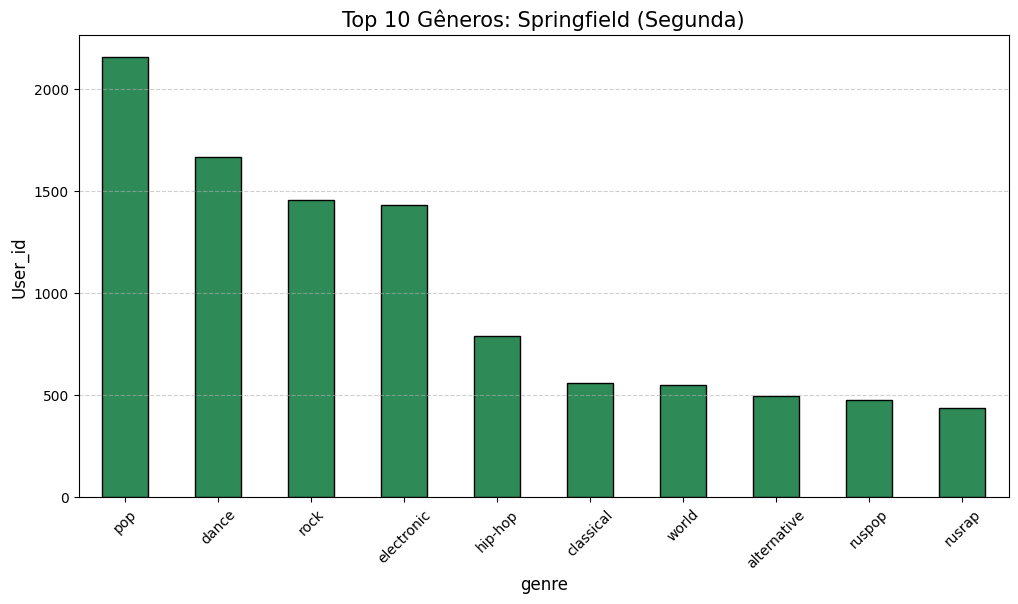

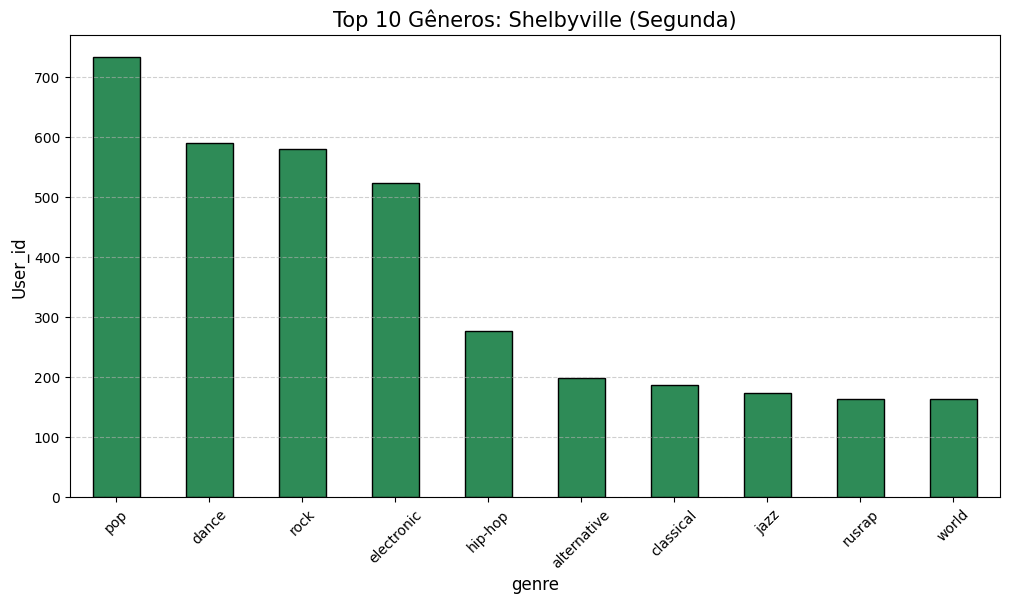

In [98]:
# Springfield na segunda-feira
top10_sp_mon = get_top_10(data, 'Springfield', 'Monday')
df_generator(top10_sp_mon, title="Top 10 Gêneros: Springfield (Segunda)")

# Shelbyville na segunda-feira
top10_sh_mon = get_top_10(data, 'Shelbyville', 'Monday')
df_generator(top10_sh_mon, title="Top 10 Gêneros: Shelbyville (Segunda)")

Ótimo a função funciona perfeitamente, agora irei testar utilizando o resultado da nossa função track_total e chamar apenas uma das linhas.

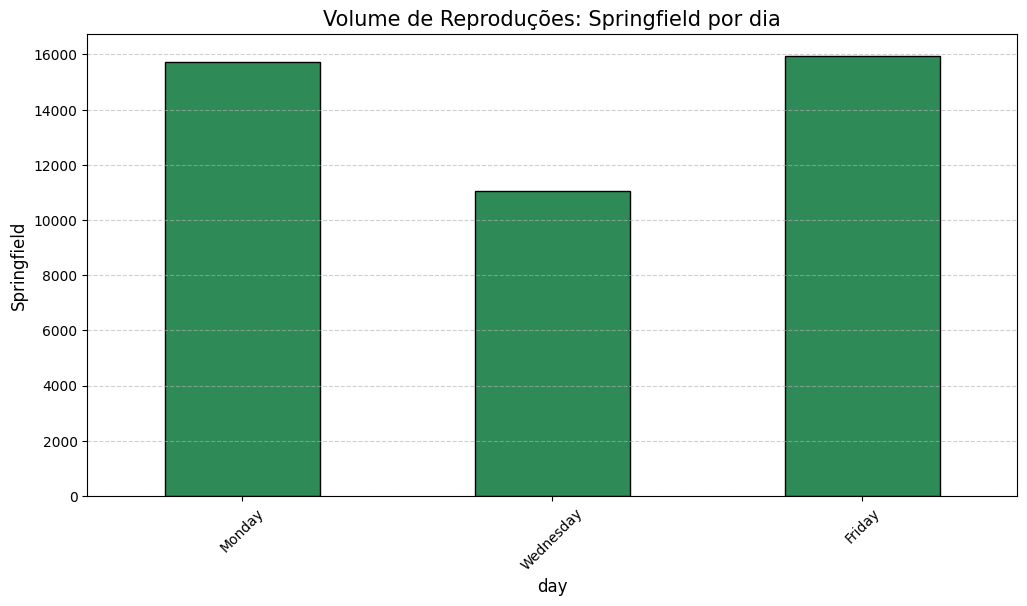

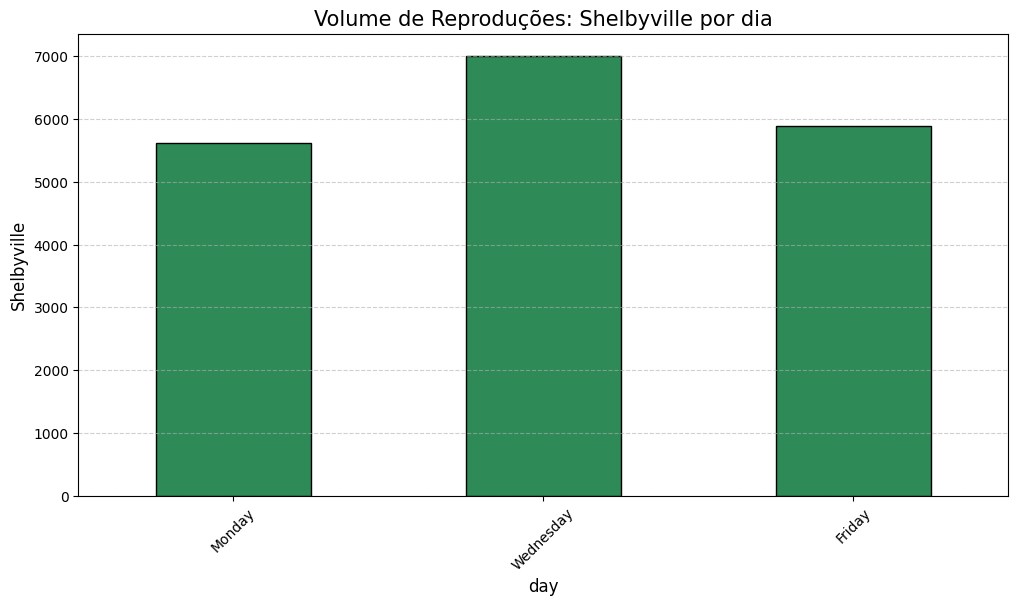

In [101]:
df_generator(resumo.loc['Springfield'], title= 'Volume de Reproduções: Springfield por dia')

df_generator(resumo.loc['Shelbyville'], title = 'Volume de Reproduções: Shelbyville por dia')

Com a análise de dados realizada acima, podemos discernir alguns pontos importantes:

1. Perfil de Consumo: Apesar da disparidade de volume entre as duas cidades (Springfield consome mais de duas vezes o volume de música de Shelbyville), o perfil de gosto musical não diverge tanto. Observamos que até o nosso Top 5 de gêneros mais tocados não há qualquer diferença. Com isso, conseguimos concluir que uma estratégia de marketing pode ser unificada para ambas as regiões no que diz respeito ao estilo musical.
2. Ritmo Semanal: Enquanto a cidade de Springfield segue um padrão mais metropolitano, com picos de atividade na segunda e na sexta-feira e uma queda na quarta-feira, Shelbyville apresenta um comportamento diferente, com seu pico de consumo sendo justamente na quarta-feira. Com esses dados, podemos tomar ações estratégicas, como impulsionar playlists específicas (ex: 'Foco/Energia') na segunda-feira em Springfield ou concentrar o investimento em anúncios nos dias de maior consumo de cada cidade para garantir um melhor retorno."

Neste projeto, desenvolvi um fluxo de análise completo, transformando dados brutos em informações estratégicas para entender o comportamento de consumo musical entre as cidades.

Destaques do processo técnico:

-Tratamento de Dados: Realizei a limpeza de registros duplicados e o preenchimento de valores ausentes, assegurando que as métricas finais fossem baseadas em uma base de dados íntegra e sem distorções.

-Padronização de Categorias: Corrigi inconsistências nos nomes dos gêneros musicais, eliminando variações linguísticas e erros de escrita. Essa etapa foi fundamental para a precisão dos agrupamentos e das contagens por categoria.

-Desenvolvimento de Funções: Criei funções modulares para automação da análise e geração de gráficos. Essa abordagem garante agilidade no processamento dos dados e permite que o código seja reaproveitado para novos conjuntos de dados.

-Análise de Padrões Regionais: Identifiquei que, embora a preferência musical seja homogênea (predomínio do Pop), existe uma diferença clara no comportamento temporal. Enquanto Springfield concentra seu consumo nos extremos da semana, Shelbyville apresenta maior engajamento na quarta-feira.